In [25]:
# 1. Biblioteka Matplotlib

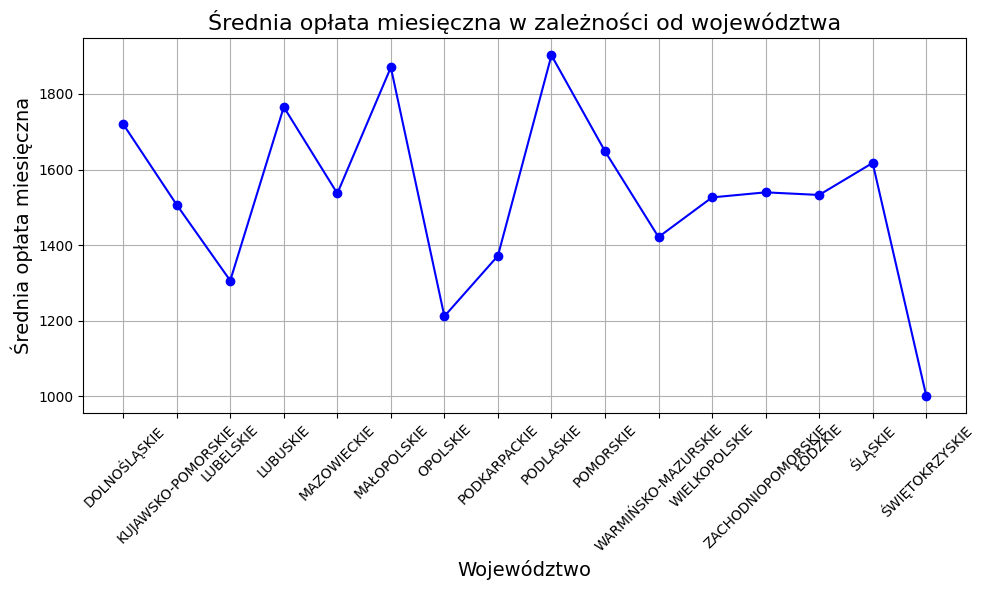

In [26]:
# 1.1 Wykres liniowy z linią przerywaną

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("RZ-opiekunowie.csv")

df['Opłata miesięczna za pobyt'] = pd.to_numeric(df['Opłata miesięczna za pobyt'].str.replace(' zł', ''), errors='coerce')
avg_oplata_miesieczna = df.groupby('Województwo')['Opłata miesięczna za pobyt'].mean().reset_index()
avg_oplata_miesieczna = avg_oplata_miesieczna[avg_oplata_miesieczna['Opłata miesięczna za pobyt'].notna()]

# Tworzenie wykresu liniowego
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(avg_oplata_miesieczna['Województwo'], avg_oplata_miesieczna['Opłata miesięczna za pobyt'], marker='o', color='blue')

# Dodanie tytułu i etykiety osi
ax.set_title('Średnia opłata miesięczna w zależności od województwa', fontsize=16)
ax.set_xlabel('Województwo', fontsize=14)
ax.set_ylabel('Średnia opłata miesięczna', fontsize=14)

# Ustawienie wykresu
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

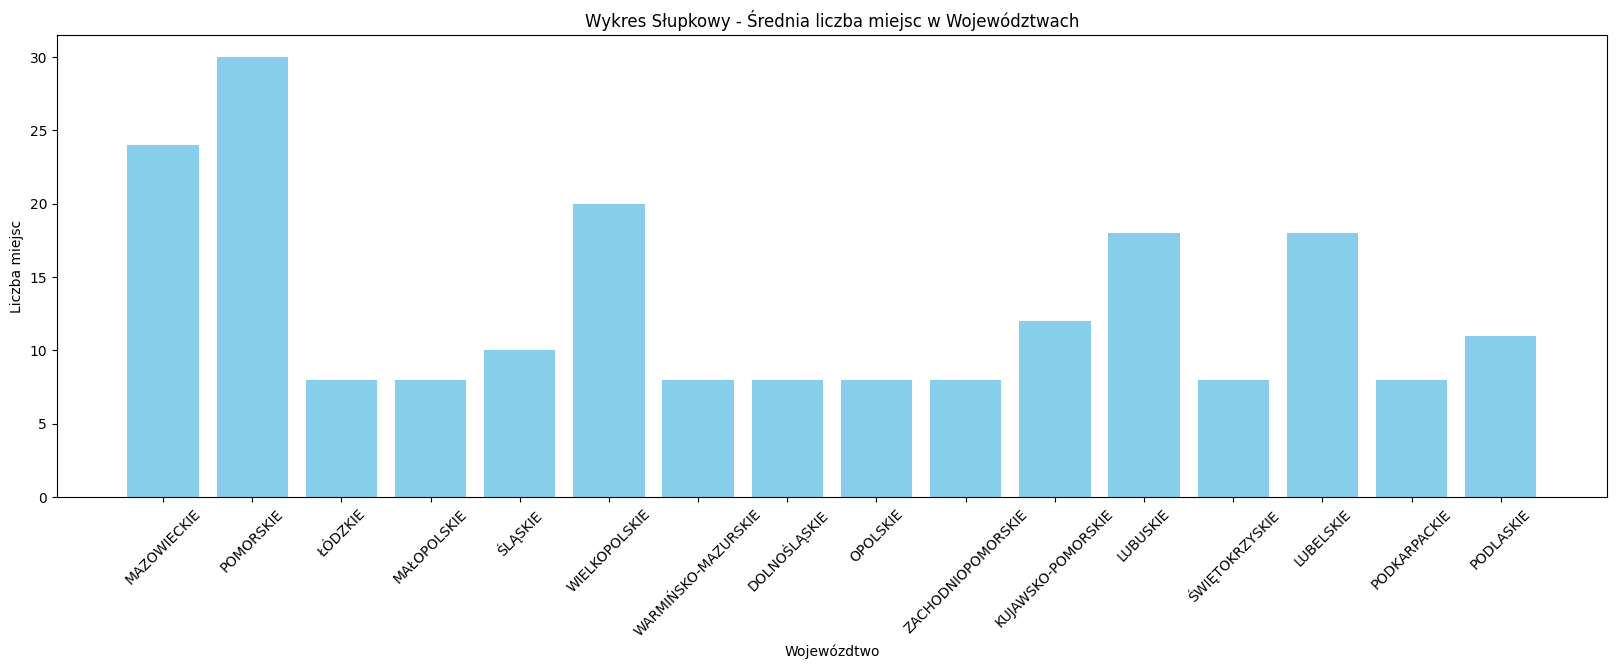

In [27]:
# 1.2 Wykres słupkowy ze zmianą koloru
plt.figure(figsize=(20, 6))
plt.bar(df['Województwo'], df['Liczba miejsc'], color='skyblue')
plt.title('Wykres Słupkowy - Średnia liczba miejsc w Województwach')
plt.xlabel('Wojewózdtwo')
plt.ylabel('Liczba miejsc')
plt.xticks(rotation=45)
plt.show()

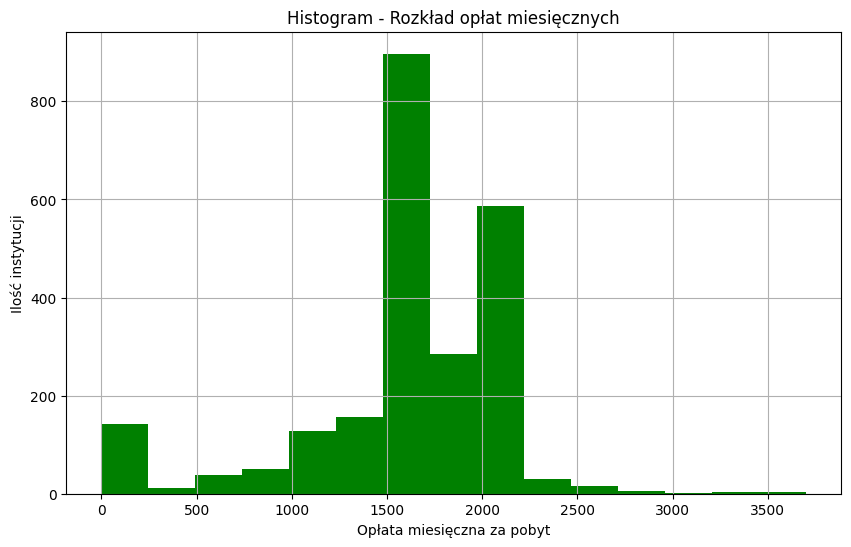

In [28]:
# 1.3 Histogram ze zmianą koloru
plt.figure(figsize=(10, 6))
plt.hist(df['Opłata miesięczna za pobyt'], bins=15, color='green')
plt.title('Histogram - Rozkład opłat miesięcznych')
plt.xlabel('Opłata miesięczna za pobyt')
plt.ylabel('Ilość instytucji')
plt.grid(True)
plt.show()


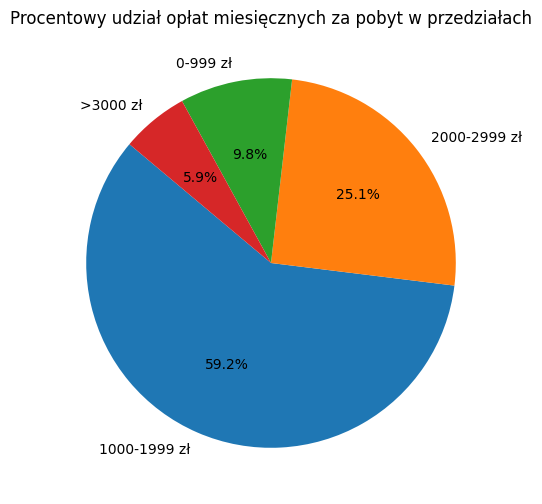

In [29]:
# 1.4 Wykres kołowy

def categorize_fee(fee):
    if fee <= 999:
        return '0-999 zł'
    elif fee <= 1999:
        return '1000-1999 zł'
    elif fee <= 2999:
        return '2000-2999 zł'
    else:
        return '>3000 zł'

# Stworzenie nowej kolumny "Opłata_kategoria"
df['Opłata_kategoria'] = df['Opłata miesięczna za pobyt'].apply(lambda x: float(x) if x != '' else 0)
df['Opłata_kategoria'] = df['Opłata_kategoria'].apply(categorize_fee)

# Podliczenie ilości w każdej kategorii
category_counts = df['Opłata_kategoria'].value_counts()

# Wyświetlenie wykresu kołowego
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Procentowy udział opłat miesięcznych za pobyt w przedziałach')
plt.show()


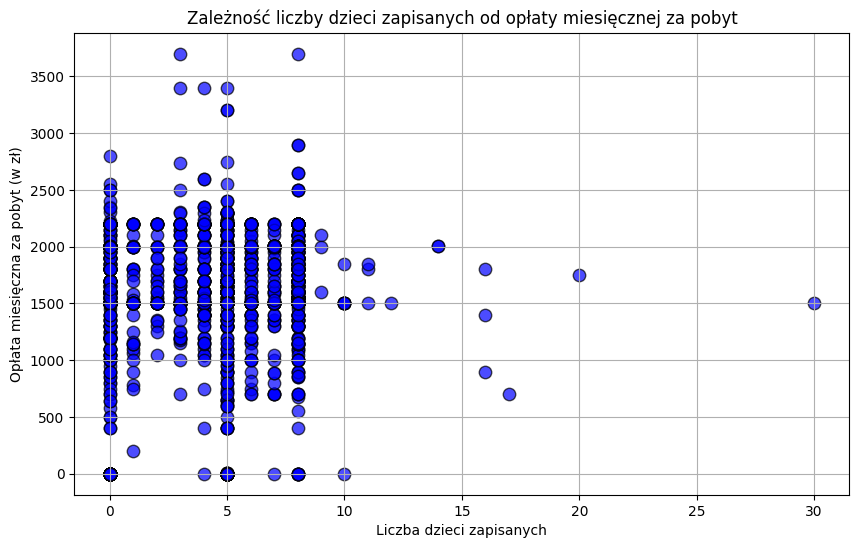

In [30]:
# 1.5 Wykres punktowy ze zmienionymi markerami i siatką
plt.figure(figsize=(10, 6))
plt.scatter(df['Liczba dzieci zapisanych'], df['Opłata miesięczna za pobyt'].apply(lambda x: float(x) if x != '' else 0), color='blue', alpha=0.7, marker='o', edgecolors='black', s=80)
plt.title('Zależność liczby dzieci zapisanych od opłaty miesięcznej za pobyt')
plt.xlabel('Liczba dzieci zapisanych')
plt.ylabel('Opłata miesięczna za pobyt (w zł)')
plt.grid(True)
plt.show()

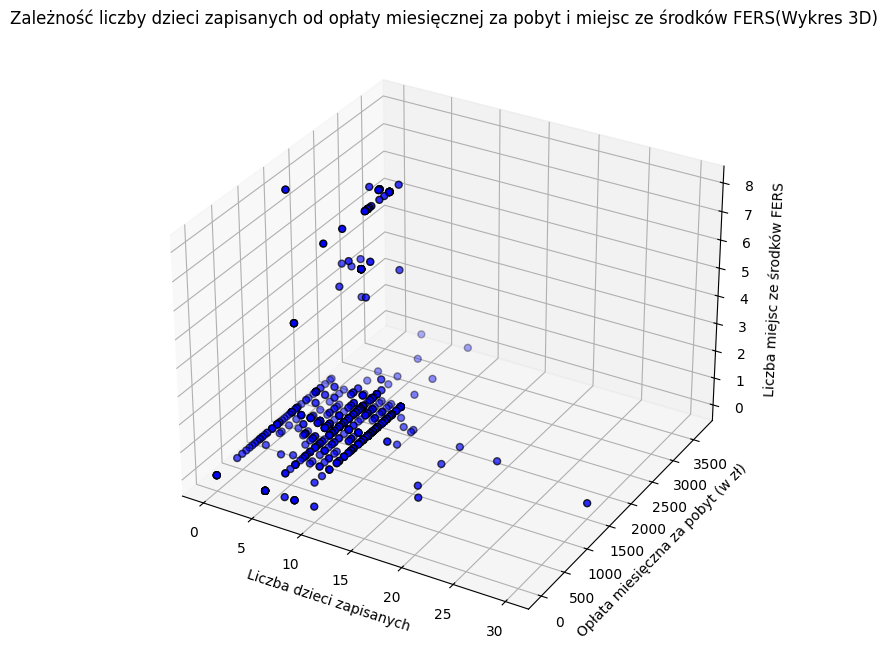

In [31]:
# 1.6 Wykres 3D:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Liczba dzieci zapisanych']
y = df['Opłata miesięczna za pobyt'].apply(lambda x: float(x) if x != '' else 0)
z = df['Liczba miejsc ze środków FERS']

ax.scatter(x, y, z, c='blue', marker='.', edgecolors='black', s=100)

ax.set_title('Zależność liczby dzieci zapisanych od opłaty miesięcznej za pobyt i miejsc ze środków FERS(Wykres 3D)')
ax.set_xlabel('Liczba dzieci zapisanych')
ax.set_ylabel('Opłata miesięczna za pobyt (w zł)')
ax.set_zlabel('Liczba miejsc ze środków FERS')

plt.show()

In [32]:
# 2. Biblioteka Plotly:

In [33]:
# 2.1 Wykres Liniowy (korzystamy z danych z punktu 1.1, dostosowanie motywu)
import plotly.express as px

fig = px.line(avg_oplata_miesieczna, x='Województwo', y='Opłata miesięczna za pobyt',
              title='Średnia opłata miesięczna w zależności od województwa',
              labels={'Opłata miesięczna za pobyt': 'Średnia opłata miesięczna', 'Województwo': 'Województwo'},
              line_shape='linear', template='plotly_dark',
              color_discrete_sequence=['blue'])  # Kolor linii

fig.update_layout(
    xaxis_title='Województwo',
    yaxis_title='Średnia opłata miesięczna',
)

fig.show()

In [36]:
# 2.2 Wykres słupkowy (z dostosowanymi kolorami))
fig = px.bar(df, x='Imię', y='Liczba miejsc', color='Województwo', title='Liczba miejsc w przedszkolu oraz liczba dzieci zapisanych w zależności od imienia Opiekunki z podziałem na Województwa',)
fig.update_layout(xaxis_title="Imię", yaxis_title="Liczba miejsc", barmode="group")

# Pokazanie wykresu
fig.show()

In [ ]:
# 2.3 Wykres kołowy
# Podział kolumny "Opłata miesięczna za pobyt" na grupy używając funkcji categorize_fee z punktu 1.4:
df['Opłata_grupy'] = df['Opłata miesięczna za pobyt'].apply(lambda x: float(x) if x != '' else 0)
df['Opłata_grupy'] = df['Opłata_grupy'].apply(categorize_fee)

group_counts = df['Opłata_grupy'].value_counts(normalize=True) * 100

fig = px.pie(values=group_counts.values, names=group_counts.index, title='Procentowy udział opłat miesięcznych za pobyt w zależności od grupy', template='plotly_dark', color_discrete_sequence=['blue'])
fig.update_layout(showlegend=True)
fig.show()

In [56]:
# 2.4 Histogram (z adnotacjami)
fig = px.histogram(df, x='Opłata miesięczna za pobyt', title='Histogram - Rozkład opłat miesięcznych', nbins=15, template='plotly_dark', color_discrete_sequence=['green'])
fig.update_layout(xaxis_title='Opłata miesięczna za pobyt', yaxis_title='Ilość instytucji')
fig.show()

In [65]:
# 2.5 Wykres punktowy

mdf = df[df['Liczba dzieci zapisanych na miejsca z FERS'] > 0] # Bierz pod uwagę tylko te rekordy, które mają wartość w kolumnie Liczba dzieci (FERS) > 0:
fig = px.scatter(mdf, x='Opłata miesięczna za pobyt', y='Liczba dzieci zapisanych na miejsca z FERS', color='Województwo', size='Liczba miejsc', title='Zależność między opłatą miesięczną a liczbą dzieci zapisanych na miejsca z FERS', labels={'Opłata miesięczna za pobyt': 'Opłata miesięczna za pobyt (zł)', 'Liczba dzieci zapisanych na miejsca z FERS': 'Liczba dzieci (FERS)',})
fig.show()

In [ ]:
# 2.6 Wykres 3D
fig = px.scatter_3d(df, x='Liczba dzieci zapisanych', y='Opłata miesięczna za pobyt', z='Liczba miejsc ze środków FERS', color='Województwo', title='Zależność liczby dzieci zapisanych od opłaty miesięcznej za pobyt i miejsc ze środków FERS (Wykres 3D)', labels={'Liczba dzieci zapisanych': 'Liczba dzieci zapisanych', 'Opłata miesięczna za pobyt': 'Opłata miesięczna za pobyt', 'Liczba miejsc ze środków FERS': 'Liczba miejsc ze środków FERS'})
fig.show()